In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from positionCorrection import positionCorrection as correct
from mpl_toolkits.mplot3d import Axes3D
import math

#matplotlib.rcParams.update({'font.size': 16})
#plt.rc('text', usetex=True)
#plt.rc('font', family='serif')

In [2]:
df = pd.read_csv('/Users/katie/Documents/Arizona/Research/satellites/data/subhaloData.csv')
#allData = np.loadtxt('mw_data_new.txt')
#MWmassesEkta = allData[:,1]
df[0:10]

,First Subhalo ID,Second Subhalo ID,Group Mass,First Subhalo Mass,Second Subhalo Mass,First Subhalo x,First Subhalo y,First Subhalo z,Second Subhalo x,Second Subhalo y,Second Subhalo z,First Subhalo v_x,First Subhalo v_y,First Subhalo v_z,Second Subhalo v_x,Second Subhalo v_y,Second Subhalo v_z
0,452859,452860,248.984337,211.022355,93.897180,20770.205078,17673.392578,26941.068359,21171.445312,17642.724609,27065.015625,-184.933182,2.903878,176.248306,-335.952118,-81.782784,149.288376
1,456350,456351,273.180246,194.004297,49.552289,674.474731,54269.167969,41096.089844,794.064514,54725.871094,41307.152344,5.803750,-312.410278,219.809891,163.595428,43.436722,282.464783
2,458066,458067,196.238713,138.309761,101.290128,41854.753906,66475.664062,42617.480469,42236.449219,66077.914062,42436.386719,-612.681335,660.239319,135.202698,-623.875305,399.522583,395.541779
3,458498,458499,172.177423,145.968188,120.789300,74960.812500,54293.656250,42730.339844,736.218140,54374.011719,42720.558594,356.763031,173.126999,116.059113,285.163177,164.397079,-48.608883
4,458989,458990,279.994856,255.688386,149.553353,3402.053955,52483.886719,51456.769531,3198.632568,52044.976562,51515.753906,202.682281,-189.323669,180.872070,13.780189,-223.829727,-112.653229
5,461342,461343,262.200637,273.926323,81.101293,9258.042969,42575.984375,30344.085938,9160.104492,42621.660156,30635.656250,156.559448,-14.241229,7.021068,59.175716,-81.922523,-137.221588
6,463168,463169,224.037842,246.085817,85.651376,53745.074219,8806.534180,40111.507812,53694.925781,8527.973633,40256.953125,69.026146,-140.230927,-262.669037,173.716705,-17.841034,-328.652679
7,464868,464869,221.258922,248.934702,68.007583,13960.470703,54431.757812,69074.187500,14151.824219,54593.035156,68759.789062,-23.717691,-322.971344,-325.783875,-18.589277,-327.447418,-324.946716
8,467304,467305,266.319773,244.031148,39.950487,53843.191406,71733.671875,22321.035156,53708.644531,71644.796875,22058.003906,53.249573,-196.451279,136.951538,-235.005997,-28.910225,244.797333
9,470590,470591,270.172683,253.383246,130.547545,23362.007812,8627.818359,29889.718750,23091.533203,8777.781250,29904.462891,-216.671066,53.520927,-30.954380,-150.224625,-165.504105,-33.870472


In [3]:
groupMass     = df['Group Mass']
subhalo1Mass  = df['First Subhalo Mass']
subhalo2Mass  = df['Second Subhalo Mass']
subhalo1Pos   = np.column_stack([df['First Subhalo x'],df['First Subhalo y'],df['First Subhalo z']])
subhalo2Pos   = np.column_stack([df['Second Subhalo x'],df['Second Subhalo y'],df['Second Subhalo z']])
subhalo1Vel   = np.column_stack([df['First Subhalo v_x'],df['First Subhalo v_y'],df['First Subhalo v_z']])
subhalo2Vel   = np.column_stack([df['Second Subhalo v_x'],df['Second Subhalo v_y'],df['Second Subhalo v_z']])
relativeVelocities = np.array([np.linalg.norm(i) for i in subhalo1Vel-subhalo2Vel])
separations = np.array([np.linalg.norm(i) for i in subhalo1Pos-subhalo2Pos])
#differences   = subhalo1Pos-subhalo2Pos

## Plotting the virial mass distribution of the groups

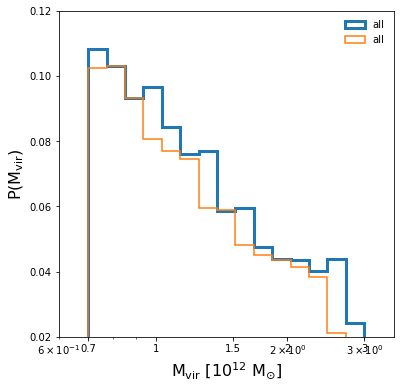

In [4]:
plt.figure(figsize=(6,6))
ax = plt.subplot(111)
min, max = np.min(groupMass/100), np.max(groupMass/100)

weights = np.ones_like(groupMass)/len(groupMass)
plt.hist(groupMass/100, bins = 10**np.linspace(np.log10(min), np.log10(max), 16), weights=weights, histtype='step', label='all',  lw=3) 
plt.hist(subhalo1Mass/100, bins = 10**np.linspace(np.log10(min), np.log10(max), 16), weights=weights, histtype='step', label='all',  lw=1.5) 
plt.xscale("log")
plt.xlabel(r'$\rm M_{vir}$ [10$^{12}$ M$\rm_{\odot}$]', fontsize=16)
plt.ylabel(r'P($\rm M_{vir}$)', fontsize=16)
plt.xlim(0.6, 3.5)
plt.ylim(0.02, 0.12)
labels = ['0.7', '1','1.5', '2', '3']
ticks = [0.7, 1, 1.5, 2, 3]
ax.set_xticks(ticks)
ax.set_xticklabels(labels)
#pp.savefig()
plt.legend(loc='upper right', frameon=False)
#plt.savefig('mvir.pdf')
#plt.savefig('fig3.eps')
#os.system('cp mvir.pdf ~/Documents/MagClouds/docs/papers/')
#plt.close()
plt.show()


## Plotting the distribution of satellite to group mass as a function of group mass

### <font color='red'>REMAKE THIS PLOT after LMC cuts</font> 

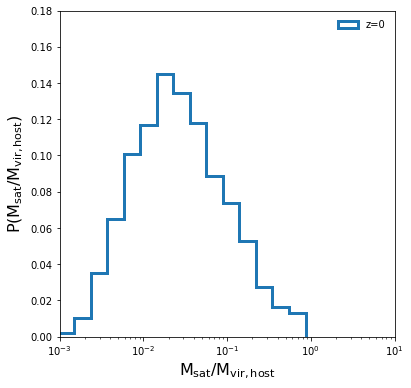

In [5]:
binningParameter = subhalo2Mass/groupMass
distributionParameter = subhalo2Mass/groupMass

plt.figure(figsize=(6,6))
ax = plt.subplot(111)
min, max = np.min(binningParameter), np.max(binningParameter) # what we're binning by (x-axis)

weights = np.ones_like(distributionParameter)/len(distributionParameter)
plt.hist(distributionParameter, bins = 10**np.linspace(np.log10(min), np.log10(max), 16), weights=weights, histtype='step', label='z=0',  lw=3) 
plt.xscale("log")
plt.xlabel(r'$\rm M_{sat}/M_{vir,host}$', fontsize=16)
plt.ylabel(r'P($\rm M_{sat}/M_{vir,host}$)', fontsize=16)
plt.xlim(10**-3, 10)
plt.ylim(0, 0.18)
# labels = ['0.7', '1','1.5', '2', '3']
# ticks = [0.7, 1, 1.5, 2, 3]
# ax.set_xticks(ticks)
# ax.set_xticklabels(labels)
plt.legend(loc='upper right', frameon=False)
plt.show()


note this doesn't take LMC mass cuts into account so this distribution will be shifted! 

## Plotting the relative separations between the 1st and 2nd subhalos

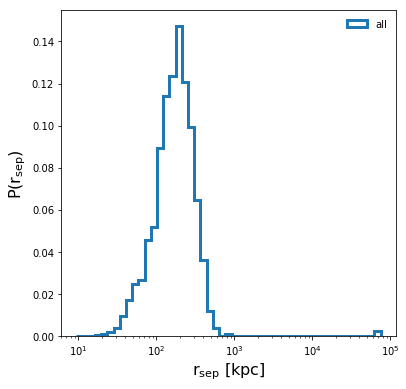

In [6]:
plt.figure(figsize=(6,6))
ax = plt.subplot(111)
min, max = np.min(separations), np.max(separations)

weights = np.ones_like(separations)/len(separations)
plt.hist(separations, bins = 10**np.linspace(np.log10(min), np.log10(max), 50), weights=weights, histtype='step', label='all',  lw=3) 
plt.xscale("log")
plt.xlabel(r'$\rm r_{sep}$ [kpc]', fontsize=16)
plt.ylabel(r'P($\rm r_{sep}$)', fontsize=16)
plt.legend(loc='upper right', frameon=False)
plt.show()


## Plotting the (corrected) relative separations between the 1st and 2nd subhalos

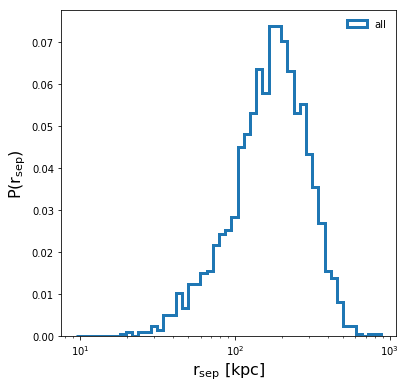

[779.61950989 200.12924974 451.37041559 286.41909698 281.63537897
 169.68663454]


In [7]:
correctedSeparations = np.array([np.linalg.norm(i) for i in np.array(correct(subhalo1Pos,subhalo2Pos))])

plt.figure(figsize=(6,6))
ax = plt.subplot(111)
min, max = np.min(correctedSeparations), np.max(correctedSeparations)

weights = np.ones_like(correctedSeparations)/len(correctedSeparations)
plt.hist(correctedSeparations, bins = 10**np.linspace(np.log10(min), np.log10(max), 50), weights=weights, histtype='step', label='all',  lw=3) 
plt.xscale("log")
plt.xlabel(r'$\rm r_{sep}$ [kpc]', fontsize=16)
plt.ylabel(r'P($\rm r_{sep}$)', fontsize=16)
plt.legend(loc='upper right', frameon=False)
plt.show()

print(correctedSeparations[np.where(separations>= 40000)])


## Plotting the corrected separations vs the relative velocities
### between the first and second most massive subhalos at z=0 of our groups
### colored by the second subhalo mass

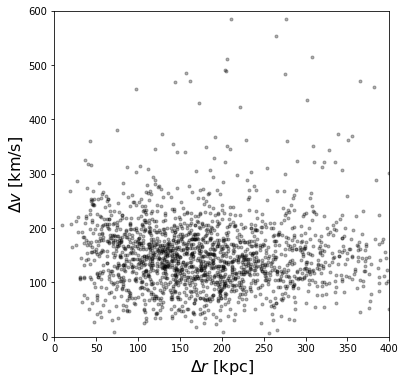

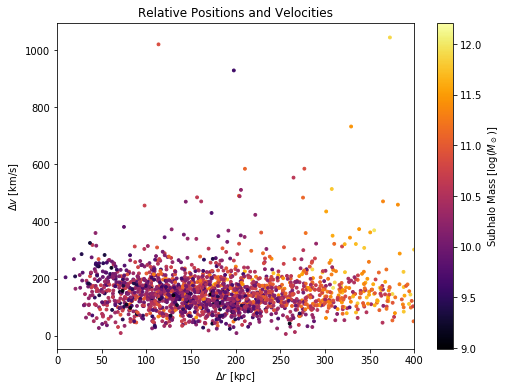

In [8]:
plt.figure(figsize=(6,6))

plt.plot(correctedSeparations, relativeVelocities,'k.',alpha = 0.3)
plt.xlabel(r'$\Delta r$ [kpc]', fontsize=16)
plt.ylabel(r'$\Delta v$ [km/s]', fontsize=16)
plt.xlim(0,400)
plt.ylim(0,600)
plt.show()

fig,ax = plt.subplots(figsize=(8,6))
scatterPlot = ax.scatter(correctedSeparations,relativeVelocities,c=np.log10(subhalo2Mass*1e10), cmap = 'inferno', s=8)
ax.set(xlabel=r'$\Delta r$ [kpc]', ylabel=r'$\Delta v$ [km/s]',title='Relative Positions and Velocities',xlim=(0,400))
plt.colorbar(scatterPlot,label="Subhalo Mass [$\log(M_\odot)$]")
plt.show()

This is way more points than shown in Ekta's paper just because I haven't made the mass cuts on the second subhalo mass

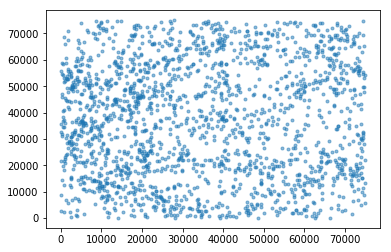

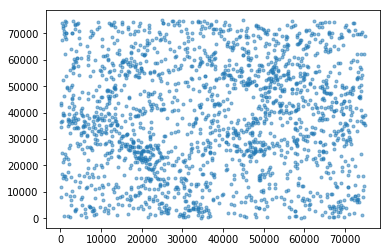

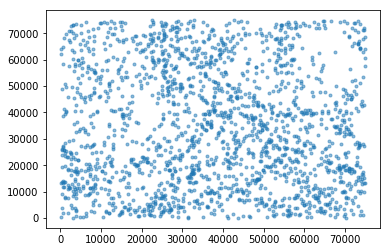

In [7]:
plt.plot(subhalo1Pos[:,0],subhalo1Pos[:,1],'.',alpha=0.5)
plt.show()

plt.plot(subhalo1Pos[:,1],subhalo1Pos[:,2],'.',alpha=0.5)
plt.show()

plt.plot(subhalo1Pos[:,2],subhalo1Pos[:,0],'.',alpha=0.5)
plt.show()

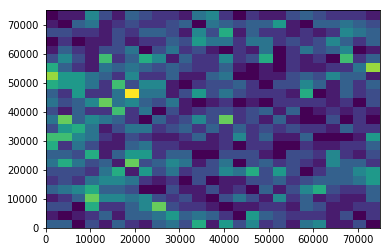

In [13]:
plt.hist2d(subhalo1Pos[:,0],subhalo1Pos[:,1],25)
plt.show()